In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

# Mapping(데이터를 다른 인덱스에 매핑) 

In [2]:
x = pd.Series({'one':1, 'two':2, 'three':3})
y = pd.Series({1:'a', 2:'b', 3:'c'})
x

one      1
two      2
three    3
dtype: int64

In [3]:
y

1    a
2    b
3    c
dtype: object

In [5]:
# map values in x to values in y
x.map(y)

one      a
two      b
three    c
dtype: object

In [6]:
# three in x will not alling / map to a value in y
x = pd.Series({'one':1, 'two':2, 'three':3})
y = pd.Series({1:'a', 2:'b'})
x.map(y)

one        a
two        b
three    NaN
dtype: object

# Replacing Values(데이터 대체)

In [13]:
s = pd.Series([0.,1.,2.,3.,2.,4.])
s

0    0.0
1    1.0
2    2.0
3    3.0
4    2.0
5    4.0
dtype: float64

In [14]:
s.replace(2,5)

0    0.0
1    1.0
2    5.0
3    3.0
4    5.0
5    4.0
dtype: float64

In [15]:
# replace all items with new values
s.replace([0,1,2,3,4], [4,3,2,1,0])

0    4.0
1    3.0
2    2.0
3    1.0
4    2.0
5    0.0
dtype: float64

In [16]:
# replace using entries in a dictionary
s.replace({0:10, 1:100})

0     10.0
1    100.0
2      2.0
3      3.0
4      2.0
5      4.0
dtype: float64

In [17]:
df = pd.DataFrame({'a':[0,1,2,3,4], 'b':[5,6,7,8,9]})
df

   a  b
0  0  5
1  1  6
2  2  7
3  3  8
4  4  9

In [18]:
df.replace({'a':1, 'b':8}, 100)

     a    b
0    0    5
1  100    6
2    2    7
3    3  100
4    4    9

In [19]:
s[0] = 10
s

0    10.0
1     1.0
2     2.0
3     3.0
4     2.0
5     4.0
dtype: float64

In [20]:
s

0    10.0
1     1.0
2     2.0
3     3.0
4     2.0
5     4.0
dtype: float64

In [21]:
s.replace([1,2,3], method='pad')

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5     4.0
dtype: float64

# Applying functions to transfrom data(데이터 변형을 위한 함수 적용)

In [22]:
s = pd.Series(np.arange(0,5))
s.apply(lambda v: v*2)

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [23]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                 columns=['a','b','c'])
df

   a   b   c
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [24]:
df.apply(lambda col: col.sum())

a    18
b    22
c    26
dtype: int64

In [26]:
df.apply(lambda row: row.sum(), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

In [27]:
df['interim'] = df.apply(lambda r: r.a * r.b, axis=1)
df

   a   b   c  interim
0  0   1   2        0
1  3   4   5       12
2  6   7   8       42
3  9  10  11       90

In [28]:
df['result'] = df.apply(lambda r: r.interim + r.c, axis=1)
df

   a   b   c  interim  result
0  0   1   2        0       2
1  3   4   5       12      17
2  6   7   8       42      50
3  9  10  11       90     101

In [29]:
df.a = df.a + df.b + df.c
df

    a   b   c  interim  result
0   3   1   2        0       2
1  12   4   5       12      17
2  21   7   8       42      50
3  30  10  11       90     101

In [30]:
df = pd.DataFrame(np.arange(0,15).reshape(3,5))
df.loc[1,2] = np.nan
df

    0   1     2   3   4
0   0   1   2.0   3   4
1   5   6   NaN   8   9
2  10  11  12.0  13  14

In [31]:
df

    0   1     2   3   4
0   0   1   2.0   3   4
1   5   6   NaN   8   9
2  10  11  12.0  13  14

In [32]:
df.dropna().apply(lambda x: x.sum(), axis=1)

0    10.0
2    60.0
dtype: float64

In [33]:
df.applymap(lambda x: '%.2f' % x)

       0      1      2      3      4
0   0.00   1.00   2.00   3.00   4.00
1   5.00   6.00    nan   8.00   9.00
2  10.00  11.00  12.00  13.00  14.00

# Creating time-series charts(시계열 차트 만들기)

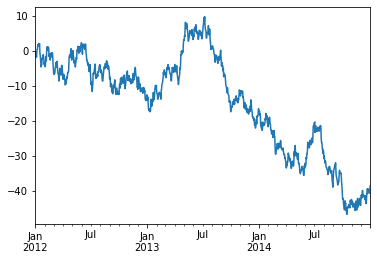

In [34]:
np.random.seed(111111)
s = pd.Series(np.random.randn(1096),
             index = pd.date_range('2012-01-01',
                                  '2014-12-31'))
walk_ts = s.cumsum()

walk_ts.plot();

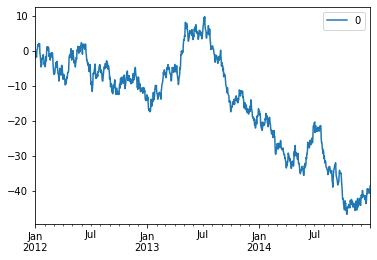

In [35]:
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [36]:
np.random.seed(111111)
df = pd.DataFrame(np.random.randn(1096, 2),
                 index = walk_ts.index, columns = list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

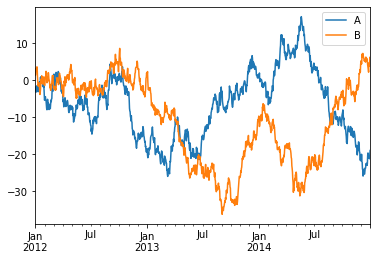

In [37]:
walk_df.plot();

In [41]:
df2['C']

2012-01-01       0
2012-01-02       1
2012-01-03       2
2012-01-04       3
2012-01-05       4
              ... 
2014-12-27    1091
2014-12-28    1092
2014-12-29    1093
2014-12-30    1094
2014-12-31    1095
Freq: D, Name: C, Length: 1096, dtype: int32

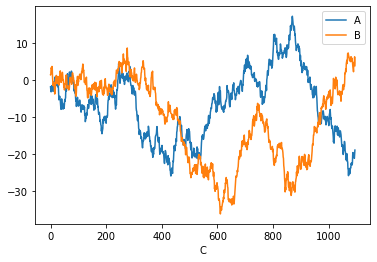

In [42]:
df2 = walk_df.copy()
df2['C'] = pd.Series(np.arange(0, len(df2)), index = df2.index)
df2.plot(x='C', y=['A','B']);

# Specifying legend content and position

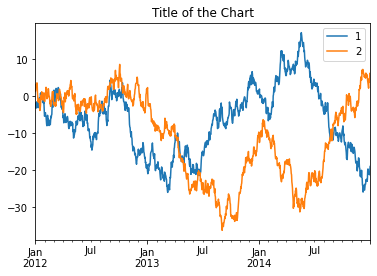

In [43]:
ax = walk_df.plot(title = 'Title of the Chart')
ax.legend(['1','2'])
plt.show()

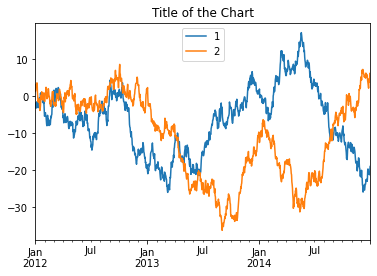

In [44]:
ax = walk_df.plot(title = 'Title of the Chart')
ax.legend(['1','2'], loc='upper center');

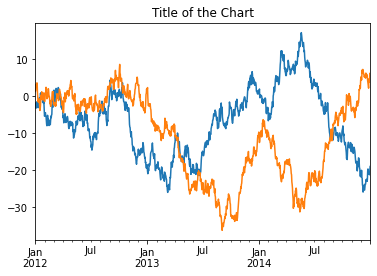

In [45]:
walk_df.plot(title = 'Title of the Chart', legend=False);

# Specifying line colors, styles, thickness and markers

<AxesSubplot:>

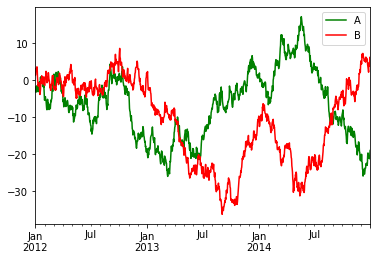

In [47]:
walk_df.plot(style=['g', '#FF0000'])

# Bar plots

<AxesSubplot:>

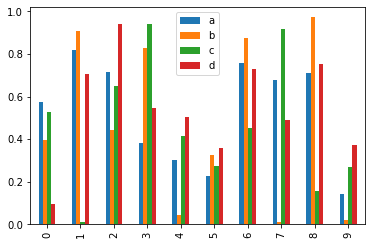

In [49]:
np.random.seed(111111)
df2 = pd.DataFrame(np.random.rand(10, 4),
                  columns = ['a','b','c','d'])

df2.plot(kind='bar')

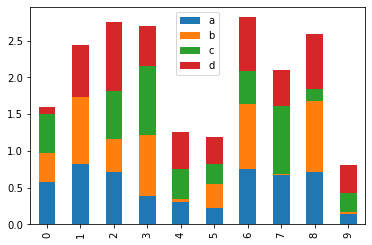

In [50]:
df2.plot(kind='bar', stacked=True);

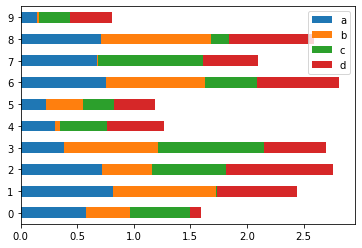

In [51]:
df2.plot(kind='barh', stacked=True);

# Histograms

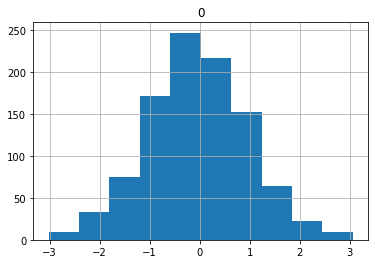

In [53]:
np.random.seed(111111)
dfh = pd.DataFrame(np.random.randn(1000))
dfh.hist();

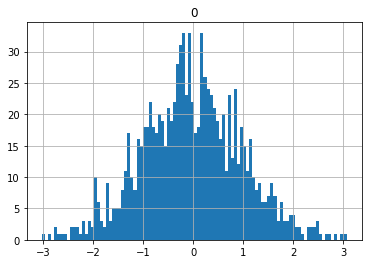

In [54]:
dfh.hist(bins = 100);

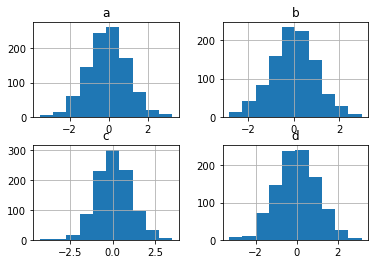

In [55]:
np.random.seed(111111)
dfh = pd.DataFrame(np.random.randn(1000, 4),
                  columns = ['a','b','c','d'])

dfh.hist();

# Box and Whisper plots

<AxesSubplot:>

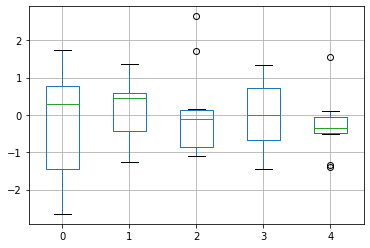

In [56]:
np.random.seed(111111)
dfb = pd.DataFrame(np.random.randn(10,5))

dfb.boxplot(return_type = 'axes')

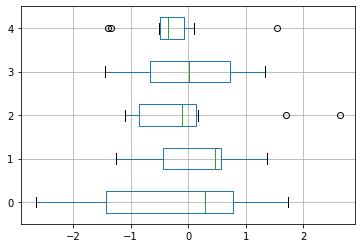

In [58]:
dfb.boxplot(vert=False);

# Area plots(영역 그래프로 누계 표현)

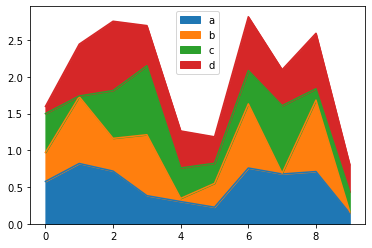

In [61]:
np.random.seed(111111)
dfa = pd.DataFrame(np.random.rand(10,4),
                  columns = ['a','b','c','d'])
dfa.plot(kind='area');

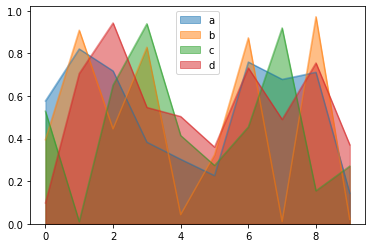

In [63]:
dfa.plot(kind='area', stacked = False);

# Scatterplots

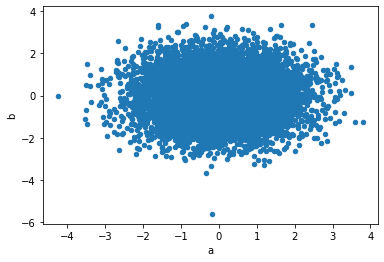

In [64]:
np.random.seed(111111)
sp_df = pd.DataFrame(np.random.randn(10000, 2),
                    columns=['a','b'])
sp_df.plot(kind = 'scatter', x='a', y='b');

# Concatenating data

In [65]:
s1 = pd.Series(np.arange(0,3))
s2 = pd.Series(np.arange(5,8))
s1

0    0
1    1
2    2
dtype: int32

In [66]:
s2

0    5
1    6
2    7
dtype: int32

In [67]:
pd.concat([s1, s2])

0    0
1    1
2    2
0    5
1    6
2    7
dtype: int32

In [69]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3),
                  columns = ['a','b','c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3,3),
                  columns = ['a','b','c'])
df1

   a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [70]:
df2

    a   b   c
0   9  10  11
1  12  13  14
2  15  16  17

In [71]:
pd.concat([df1, df2])

    a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
0   9  10  11
1  12  13  14
2  15  16  17

In [73]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3),
                  columns = ['a','b','c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3,3),
                  columns = ['a','c','d'])
df1

   a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [75]:
df2

    a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [76]:
pd.concat([df1, df2])

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [77]:
c = pd.concat([df1, df2], keys=['df1', 'df2'])
c

        a    b   c     d
df1 0   0  1.0   2   NaN
    1   3  4.0   5   NaN
    2   6  7.0   8   NaN
df2 0   9  NaN  10  11.0
    1  12  NaN  13  14.0
    2  15  NaN  16  17.0

In [78]:
c.loc['df2']

    a   b   c     d
0   9 NaN  10  11.0
1  12 NaN  13  14.0
2  15 NaN  16  17.0

In [79]:
pd.concat([df1, df2], axis=1)

   a  b  c   a   c   d
0  0  1  2   9  10  11
1  3  4  5  12  13  14
2  6  7  8  15  16  17

In [81]:
df3 = pd.DataFrame(np.arange(20, 26).reshape(3,2),
                  columns = ['a','d'],
                  index = [2,3,4])
df3

    a   d
2  20  21
3  22  23
4  24  25

In [82]:
pd.concat([df1, df3], axis=1)

     a    b    c     a     d
0  0.0  1.0  2.0   NaN   NaN
1  3.0  4.0  5.0   NaN   NaN
2  6.0  7.0  8.0  20.0  21.0
3  NaN  NaN  NaN  22.0  23.0
4  NaN  NaN  NaN  24.0  25.0

In [83]:
pd.concat([df1, df3], axis=1, join='inner')

   a  b  c   a   d
2  6  7  8  20  21

In [84]:
df = pd.concat([df1, df2],
               axis=1,
              keys=['df1','df2'])
df

  df1       df2        
    a  b  c   a   c   d
0   0  1  2   9  10  11
1   3  4  5  12  13  14
2   6  7  8  15  16  17

In [85]:
df.loc[:, 'df2']

    a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [86]:
df1.append(df2)

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [87]:
df1.append(df2, ignore_index = True)

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
3   9  NaN  10  11.0
4  12  NaN  13  14.0
5  15  NaN  16  17.0

# An overview of merges

In [90]:
customers = {'CustomerID':[10, 11],
            'Name':['Mike','Marcia'],
            'Address':['Address for Mike','Address for Marcia']}
customers = pd.DataFrame(customers)
customers

   CustomerID    Name             Address
0          10    Mike    Address for Mike
1          11  Marcia  Address for Marcia

In [91]:
orders = {'CustomerID': [10,11,10],
         'OrderDate':[date(2014, 12, 1),
                     date(2014, 12, 1),
                     date(2014, 12, 1)]}
orders = pd.DataFrame(orders)
orders

   CustomerID   OrderDate
0          10  2014-12-01
1          11  2014-12-01
2          10  2014-12-01

In [92]:
customers.merge(orders)

   CustomerID    Name             Address   OrderDate
0          10    Mike    Address for Mike  2014-12-01
1          10    Mike    Address for Mike  2014-12-01
2          11  Marcia  Address for Marcia  2014-12-01

In [93]:
left_data = {'key1':['a','b','c'],
            'key2':['x','y','z'],
            'lval1':[0,1,2]}
right_data = {'key1':['a','b','c'],
             'key2':['x','a','z'],
             'rval':[6,7,8]}
left = pd.DataFrame(left_data, index=[0,1,2])
right = pd.DataFrame(right_data, index=[1,2,3])
left

  key1 key2  lval1
0    a    x      0
1    b    y      1
2    c    z      2

In [95]:
right

  key1 key2  rval
1    a    x     6
2    b    a     7
3    c    z     8

In [96]:
left.merge(right)

  key1 key2  lval1  rval
0    a    x      0     6
1    c    z      2     8

In [99]:
left.merge(right, on='key1')

  key1 key2_x  lval1 key2_y  rval
0    a      x      0      x     6
1    b      y      1      a     7
2    c      z      2      z     8

In [100]:
left.merge(right, on=['key1','key2'])

  key1 key2  lval1  rval
0    a    x      0     6
1    c    z      2     8

In [101]:
pd.merge(left, right, left_index=True, right_index=True)

  key1_x key2_x  lval1 key1_y key2_y  rval
1      b      y      1      a      x     6
2      c      z      2      b      a     7

# Specifying the join semantics of a merge operation

In [103]:
left.merge(right, how='outer')

  key1 key2  lval1  rval
0    a    x    0.0   6.0
1    b    y    1.0   NaN
2    c    z    2.0   8.0
3    b    a    NaN   7.0

In [104]:
left.merge(right, how='left')

  key1 key2  lval1  rval
0    a    x      0   6.0
1    b    y      1   NaN
2    c    z      2   8.0

In [105]:
left.merge(right, how='right')

  key1 key2  lval1  rval
0    a    x    0.0     6
1    b    a    NaN     7
2    c    z    2.0     8

In [106]:
left.join(right, lsuffix='_left', rsuffix='_right', how='inner')

  key1_left key2_left  lval1 key1_right key2_right  rval
1         b         y      1          a          x     6
2         c         z      2          b          a     7

# Pivoting

In [107]:
sensor_readings = pd.read_csv('../data/accel.csv')
sensor_readings

    interval axis  reading
0          0    X      0.0
1          0    Y      0.5
2          0    Z      1.0
3          1    X      0.1
4          1    Y      0.4
..       ...  ...      ...
7          2    Y      0.3
8          2    Z      0.8
9          3    X      0.3
10         3    Y      0.2
11         3    Z      0.7

[12 rows x 3 columns]

In [108]:
sensor_readings.pivot(index='interval',
                     columns='axis',
                     values='reading')

axis        X    Y    Z
interval               
0         0.0  0.5  1.0
1         0.1  0.4  0.9
2         0.2  0.3  0.8
3         0.3  0.2  0.7

# Stacking using non-hierarchical indexes

In [109]:
df = pd.DataFrame({'a':[1,2]}, index = ('one','two'))
df

     a
one  1
two  2

In [110]:
stacked1 = df.stack()
stacked1

one  a    1
two  a    2
dtype: int64

In [111]:
stacked1[('one','a')]

1

In [112]:
df = pd.DataFrame({'a':[1,2],
                  'b':[3,4]},
                 index = ['one','two'])
df

     a  b
one  1  3
two  2  4

In [113]:
stacked2 = df.stack()
stacked2

one  a    1
     b    3
two  a    2
     b    4
dtype: int64

In [115]:
stacked2[('one','b')]

3

# Unstacking using hierarchical indexes

In [117]:
user1 = sensor_readings.copy()
user2 = sensor_readings.copy()

user1['who'] = 'Mike'
user2['who'] = 'Mikael'

user2['reading'] *= 100

multi_user_sensor_data = pd.concat([user1, user2]).set_index(['who','interval','axis'])
multi_user_sensor_data

                      reading
who    interval axis         
Mike   0        X         0.0
                Y         0.5
                Z         1.0
       1        X         0.1
                Y         0.4
...                       ...
Mikael 2        Y        30.0
                Z        80.0
       3        X        30.0
                Y        20.0
                Z        70.0

[24 rows x 1 columns]

In [118]:
multi_user_sensor_data.loc['Mike']

               reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [119]:
multi_user_sensor_data.xs(1, level='interval')

             reading
who    axis         
Mike   X         0.1
       Y         0.4
       Z         0.9
Mikael X        10.0
       Y        40.0
       Z        90.0

In [120]:
multi_user_sensor_data.unstack()

                reading             
axis                  X     Y      Z
who    interval                     
Mikael 0            0.0  50.0  100.0
       1           10.0  40.0   90.0
       2           20.0  30.0   80.0
       3           30.0  20.0   70.0
Mike   0            0.0   0.5    1.0
       1            0.1   0.4    0.9
       2            0.2   0.3    0.8
       3            0.3   0.2    0.7

In [121]:
multi_user_sensor_data.unstack(level=0)

              reading     
who            Mikael Mike
interval axis             
0        X        0.0  0.0
         Y       50.0  0.5
         Z      100.0  1.0
1        X       10.0  0.1
         Y       40.0  0.4
...               ...  ...
2        Y       30.0  0.3
         Z       80.0  0.8
3        X       30.0  0.3
         Y       20.0  0.2
         Z       70.0  0.7

[12 rows x 2 columns]

In [122]:
unstacked = multi_user_sensor_data.unstack(['who','axis'])
unstacked

         reading                              
who         Mike           Mikael             
axis           X    Y    Z      X     Y      Z
interval                                      
0            0.0  0.5  1.0    0.0  50.0  100.0
1            0.1  0.4  0.9   10.0  40.0   90.0
2            0.2  0.3  0.8   20.0  30.0   80.0
3            0.3  0.2  0.7   30.0  20.0   70.0

In [123]:
unstacked.stack(level='who')

                reading             
axis                  X     Y      Z
interval who                        
0        Mikael     0.0  50.0  100.0
         Mike       0.0   0.5    1.0
1        Mikael    10.0  40.0   90.0
         Mike       0.1   0.4    0.9
2        Mikael    20.0  30.0   80.0
         Mike       0.2   0.3    0.8
3        Mikael    30.0  20.0   70.0
         Mike       0.3   0.2    0.7

# Melting

In [124]:
data = pd.DataFrame({'Name' : ['Mike','Mikael'],
                    'Height' : [6.1, 6.0],
                    'Weight':[220,185]})
data

     Name  Height  Weight
0    Mike     6.1     220
1  Mikael     6.0     185

In [125]:
pd.melt(data,
       id_vars=['Name'],
       value_vars = ['Height','Weight'])

     Name variable  value
0    Mike   Height    6.1
1  Mikael   Height    6.0
2    Mike   Weight  220.0
3  Mikael   Weight  185.0